In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import scipy.special as sps
import pandas as pd
import random

In [51]:
#Model Variables and Parameters
age_average_x=20
# Current average ages in year for underground and overhead distribution lines (in years)
length_average_x=0.5
# Circuit length in mile for underground and overhead transission and distribution lines
number_circuit= 650
# Numbers showing different circuit in network (Shrewsbury has 191.5 miles overhead, 121.7 miles underground line, eaach circuit is about 25 miles in Larsen paper)
baseyear=2021
#the year in which we are going to start conducting cost analysis
underground_baseyear=121
#Length of undergeound lines in miles in base year
r=0.1
# Discount rate=10%
overhead_line={'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
underground_line={'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#overhead_line={'over_or_under':0,'lifespan':60,'replcost':104000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
#underground_line={'over_or_under':1,'lifespan':45,'replcost':357000,'replcost_growth_rate':0.02,'om_percentage_replcost':0.005}
# over_or_under= Type of Line. x=0 for underground distribution lines and x=1 for overhead distribution lines
#lifespan=Useful lifespan of overhead line and underground lines (60 for overhead and 45 for underground)
#replcost_growth_rate= replacement cost annual growth/decay rate 
# om_percentage_replcost= percentage of the overall replacement costs which equals to annual O&M expenses (OPEX) for each type of T&D line
###

In [4]:
shape_age_x=(age_average_x)/(((age_average_x)/2)**2)
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_age_x)

0.2


In [5]:
scale_age_x=(((age_average_x)/2)**2)/(age_average_x)
#scale of Gamma distribution required for simulating line circuits ages
print(scale_age_x)

5.0


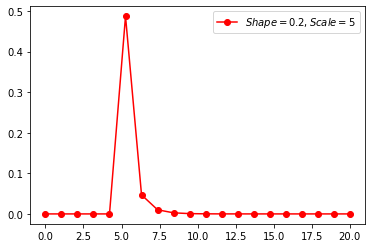

In [6]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_age_x, scale_age_x)

plt.plot(x, y, "ro-", label=(r'$Shape=0.2, Scale=5$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits ages

In [7]:
shape_length_x=length_average_x/(length_average_x/2)**2
#Shape of Gamma distribution required for simulating liene circuits ages
print(shape_length_x)

8.0


In [8]:
scale_length_x=(length_average_x/2)**2/length_average_x
#scale of Gamma distribution required for simulating line circuits ages
print(scale_length_x)

0.125


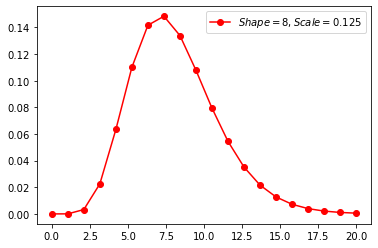

In [9]:
x = np.linspace(0, 20, 20)
y = stats.gamma.pdf(x, shape_length_x, scale_length_x)

plt.plot(x, y, "ro-", label=(r'$Shape=8, Scale=0.125$'))
plt.legend(loc='upper right')
#Plotting gamma distribution with shape and scale of circuits lengths

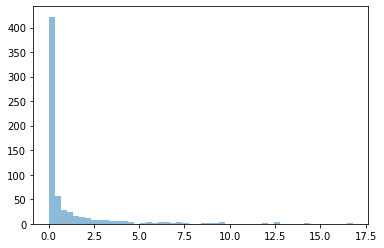

[5.24718232e-02 2.39945001e-02 5.68304829e+00 2.38675170e-04
 1.34833073e+01 1.58131329e+00 1.79988875e+00 1.17450508e-02
 1.23060176e-02 2.67436053e+00 9.71405761e-02 2.42132700e-10
 4.94434739e-08 1.75051251e-02 3.02300677e-08 5.54469913e-02
 2.02567739e+00 9.59921741e+00 4.03489552e-05 6.21786772e-01
 6.79479832e+00 7.69748395e-05 1.14043295e-02 1.16997219e+00
 5.49201947e-01 7.51182615e-03 1.86294352e+00 3.47796635e-04
 2.37979558e-02 6.97610228e-01 6.90007409e-01 3.86631155e+00
 5.55562671e+00 8.76844493e-02 7.40956483e-05 2.17041431e-01
 1.27519368e-01 1.77244444e+00 1.02960155e+00 1.71935867e-01
 6.79109848e-01 5.71160280e-05 1.06049785e-04 1.29110700e+00
 2.69330642e-05 9.96322687e-04 5.49507695e-01 6.05941989e-02
 8.22203055e-01 9.82040652e-03 2.31089639e-06 4.68171227e-03
 2.90587924e-06 9.14465638e-02 5.26390944e-04 1.01579615e+01
 9.69173518e+00 4.86329539e-02 5.15668759e-02 2.67785624e+00
 2.95845196e-03 1.31185949e-04 3.66107899e-05 1.07845064e-03
 9.92550822e-01 2.034696

In [10]:
age=np.random.gamma(shape_age_x,scale_age_x,number_circuit)
plt.hist(np.random.gamma(shape_age_x,scale_age_x,number_circuit),alpha=0.5,bins=50)
plt.show()
print (age)
#Randomly determined circuit's ages in the base year

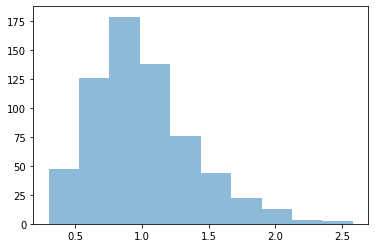

In [117]:
lengths=np.random.gamma(shape_length_x,scale_length_x,number_circuit)
plt.hist(np.random.gamma(shape_length_x,scale_length_x,number_circuit),alpha=0.5)
plt.show()
#print (lengths)
#Randomly determined circuit's ages in the base year
### I guess these numbers are not correct because I do not expect to see such circuit's ages from a gamma distribution with an average age 20.

In [244]:
#Defining Circuit class with a new approach: ommiting for t from --- to --- from class methods.
###I still do not know without using for loop, how I can manage to generate some of the required outputs.
class Circuit:
    ## The __init__ function is the constructor
    def __init__(self, shape_age_x, scale_age_x, shape_length_x, scale_length_x, overhead_proportion):        
        self.age = [np.random.gamma(shape_age_x, scale_age_x)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(shape_length_x,scale_length_x) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        #self.replcost_rate=self.set_replcost_rate_array
        if self.underground[0]==1:
            self.replcost_rate=[0,underground_line['replcost']]
        else:
            self.replcost_rate=[0,overhead_line['replcost']]       
        self.capex=[0]
        if self.underground[0]==1:
            self.opex=[]
        else:
            self.opex=[]  
        
    ###Lifecycle Infrastructure Costs:
    def get_underground_baseyear(self):
        return (self.underground[0])
    # Determining circuit's overhead or underground status in the base years 
    def get_age_baseyear(self):
        return (self.age[0])
    # Determining circuit's age in the base year
    def get_length(self):
        return (self.length)
    # Determining circuit's length
    def add_age(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
        else:
            lifespan_x= int(overhead_line['lifespan'])
        age=(self.age[-1])
        if age<(lifespan_x-1):
            age+=1
            self.age.append(age)
            self.underground.append(self.underground[-1])
        else:
            self.age.append(1)
            self.underground.append(1)
    # Adding one year to the age of circuit, compare it to the lifespan and append this age to age list. Also append underground status to its list.
    def get_underground_array(self):
        return(self.underground)
    # Returning underground list
    def get_age_array(self):
        return(self.age)
    # Returning ages list   
    def add_replcost_intrest_rate(self):
        underground=self.underground[-1]
        if underground==1:
            lifespan_x= int(underground_line['lifespan'])
            replcost_baseyear=underground_line['replcost']
            replcost_growth_rate_x=underground_line['replcost_growth_rate']
        else:
            lifespan_x= int(overhead_line['lifespan'])
            replcost_baseyear=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        if (self.age[-1])==1:
            replcost_x_new=underground_line['replcost']*((1+replcost_growth_rate_x)**(len(self.age)-1))
            self.replcost_rate.append(replcost_x_new)
        else:
            replcost_x_new=(self.replcost_rate[-1])+(replcost_growth_rate_x)*(self.replcost_rate[-1])
            self.replcost_rate.append(replcost_x_new)
        return(self.replcost_rate)
    #Adding interest rate to the replacement cost based on a year and also coonsidering different replacementcost rate when underground=1
    #def set_replcost_array(self):
        #replcost=[0]
        #if self.underground[0]==1:
            #replcost.append(underground_line['replcost'])
        #else:
            #replcost.append(overhead_line['replcost'])
        #return (replcost)    
    def capex_calculation(self):
        if (self.age[-1])==1:
            length=self.length
            replcost_rate=self.replcost_rate[-1]
            replcost_new=(replcost_rate)*(length)
            self.capex.append(replcost_new)
        else:
            replcost_new=0
            self.capex.append(replcost_new)
        return(self.capex)
    #Determining capital expenses which is replacement cost for each circuit based on the rate of replacement cost in that year and length of the circuit.
    def opex_calculation(self):
        underground=self.underground[-1]
        replcost_rate=self.replcost_rate[-1]
        if underground==1:
            om_percentage_replcost= int(underground_line['om_percentage_replcost'])
        else:
            om_percentage_replcost= int(overhead_line['om_percentage_replcost'])
        opex_new=(om_percentage_replcost)*(replcost_rate)
        self.opex.append(opex_new)
        return(self.opex)



In [245]:
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
    print(circuit_i.get_underground_baseyear())
    print(circuit_i.get_age_baseyear())
    print(circuit_i.get_length())
    for t in range (200):
        circuit_i.add_age()
        circuit_i.add_replcost_intrest_rate()
        circuit_i.capex_calculation()
        circuit_i.opex_calculation()
    print(circuit_i.get_underground_array())
    print(circuit_i.get_age_array())
    print(circuit_i.replcost_rate)
    print(circuit_i.capex)
    print(circuit_i.opex)

0
3.4930742330396103
0.6256932265525245
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3.4930742330396103, 4.493074233039611, 5.493074233039611, 6.493074233039611, 7.493074233039611, 8.49307423303961, 9.49307423303961, 10.49307423303961, 11.49307423303961, 12.49307423303961, 13.49307423303961, 14.49307423303961, 15.49307423303961, 16.49307423303961, 17.49307423303961, 18.49307423303961, 19.49307423303961, 20.49307423303961, 21.49307423303

1.0112361356460522
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.48270162237163916, 1.4827016223716392, 2.482701622371639, 3.482701622371639, 4.482701622371639, 5.482701622371639, 6.482701622371639, 7.482701622371639, 8.48270162237164, 9.48270162237164, 10.48270162237164, 11.48270162237164, 12.48270162237164, 13.48270162237164, 14.48270162237164, 15.48270162237164, 16.48270162237164, 17.48270162237164, 18.48270162237164, 19.48270162237

[0, 357000, 364140.0, 371422.8, 378851.256, 386428.28112, 394156.8467424, 402039.983677248, 410080.78335079295, 418282.3990178088, 426648.04699816497, 435181.00793812826, 443884.6280968908, 452762.3206588286, 461817.5670720052, 471053.9184134453, 480474.9967817142, 490084.49671734846, 499886.1866516954, 509883.91038472933, 520081.58859242394, 530483.2203642724, 541092.8847715578, 551914.7424669889, 562953.0373163286, 574212.0980626552, 585696.3400239083, 597410.2668243864, 609358.4721608742, 621545.6416040916, 633976.5544361734, 646656.0855248969, 659589.2072353947, 672780.9913801026, 686236.6112077046, 699961.3434318587, 713960.5703004958, 728239.7817065058, 742804.5773406359, 757660.6688874486, 772813.8822651976, 788270.1599105016, 804035.5631087116, 820116.2743708858, 836518.5998583036, 853248.9718554696, 870313.9512925805, 887720.2303184321, 905474.6349248007, 923584.1276232967, 942055.8101757626, 960896.9263792778, 980114.8649068634, 999717.1622050006, 1019711.5054491006, 1040105.

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.3576566206997741, 1.3576566206997742, 2.357656620699774, 3.357656620699774, 4.357656620699775, 5.357656620699775, 6.357656620699775, 7.357656620699775, 8.357656620699775, 9.357656620699775, 10.357656620699775, 11.357656620699775, 12.357656620699775, 13.357656620699775, 14.357656620699775, 15.357656620699775, 16.357656620699775, 17.357656620699775, 18.357656620699775, 19.357656620699775, 20.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [247]:
class Circuit2:
    ## The __init__ function is the constructor
    def __init__(self, shape_age_x, scale_age_x, shape_length_x, scale_length_x, overhead_proportion):        
        self.age = [np.random.gamma(shape_age_x, scale_age_x)] # set the age as a list, which can be dynamically expanded
        self.length = np.random.gamma(shape_length_x,scale_length_x) # we can assume the length is fixed over time
        overhead_probability = random.uniform(0,1)
        if overhead_probability > overhead_proportion: # if underground = 0, then segment is overhead.
            self.underground = [1] # again, a dynamic list.
        else:
            self.underground = [0]
        
###Lifecycle Infrastructure Costs:
    def get_underground(self):
        #self.over_or_under = self.underground
        return (self.underground)
    # Randomly determining status of overhead or underground of circuit
    def get_age_baseyear(self):
        #random.seed(1)
        #self.age= np.random.gamma(shape_age_x, scale_age_x)
        return (self.age)
    # Randomly determining circuit's ages in the base year
    def get_length_baseyear(self):
        #random.seed(1)
        #self.length= np.random.gamma(shape_length_x,scale_length_x)
        return (self.length)
    # Randomly determining circuit's ages in the base year
###Three above methods are defined to identify lengh, age and overhead or underground, which are three atributes of a circuit.
    #def lifespan_over_or_under(self):
        #if self.over_or_under()==0:
            #lifespan_x= overhead_line['lifespan']
        #elif self.over_or_under()==1:
            #lifespan_x= underground_line['lifespan']
        #else:
            #lifespan_x=0
        #return (lifespan_x)
    #def replcost_x_over_or_under(self):
        #if self.over_or_under==0:
            #lifespan_x= overhead_line['lifespan']
        #if self.over_or_under==1:
            #lifespan_x= underground_line['lifespan']
        #print (lifespan_x)
###Above methods are for defining different parameters in the model subject to x=0(overhead) or x=1(underground)
    
    # def set_lifespan(): # SET lifespan separately
    def get_age_array(self):
        over_or_under= self.get_underground()[0]
        if over_or_under==0:
            lifespan_x= int(overhead_line['lifespan'])
        elif over_or_under==1:
            lifespan_x= int(underground_line['lifespan'])
        #else:
            #lifespan_x=0
        age_i_baseyear= self.age[0] #self.get_age_baseyear()
        age_i_t=0
        age_i_t_array=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            if age_i_baseyear<=lifespan_x:
                age_i_t= (age_i_baseyear)+(t-baseyear)
                age_i_t_array.append(age_i_t)
            elif age_i_baseyear-lifespan_x==1:
                age_i_t=1
                age_i_t_array.append(age_i_t)
            elif age_i_baseyear-lifespan_x>1:
                age_i_t=(age_i_t)+1
                age_i_t_array.append(age_i_t)
        return(age_i_t_array)
    def get_current_age(self,t):
        ages_list=self.get_age_array()
        current_age=ages_list[t-baseyear]
        return(current_age)
    # Determining list of circuit's ages based on different ts
    def get_replcost_x_t(self):
        #over_or_under= self.get_underground()
        over_or_under= self.get_underground()[0]
        if over_or_under==0:
            lifespan_x=overhead_line['lifespan']
            replecost_x=overhead_line['replcost']
            replcost_growth_rate_x=overhead_line['replcost_growth_rate']
        elif over_or_under==1:
            lifespan_x= underground_line['lifespan']
            replecost_x=underground_line['replcost']
            replcost_growth_rate_x= underground_line['replcost_growth_rate']
        #else:
            #lifespan_x=0
            #replecost_x=0
            #replcost_growth_rate_x=0
        replcost_x_array=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            if t==baseyear:
                replcost_x_t= replecost_x
                replcost_x_array.append(replcost_x_t)
            else:
                replcost_x_t= (replecost_x)+(replcost_growth_rate_x)*(t-baseyear)*(replecost_x)
                replcost_x_array.append(replcost_x_t)
        return (replcost_x_array)
    # Determining list of replacement cost for circuite i from line x based on different ts.
    def get_capex_StatusQuo_i(self): 
        replcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        capex_StatusQuo_i=0
        capex_StatusQuo_list=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            replcost_x_t= replcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((rplcost_x_t)(age_i_t))/((1+r)**(t-baseyear))
                capex_StatusQuo_i=(capex_StatusQuo_i)+(capex_i)
                capex_StatusQuo_list.append(capex_StatusQuo_i)
            else:
                capex_StatusQuo_i=0
                capex_StatusQuo_list.append(capex_StatusQuo_i)
        return (max(capex_StatusQuo_list))
    #Determining list of Status quo capital expenses (CAPEX) occurring in future years (t) when the age of the circuit exceeds the expected useful lifespan
    def get_opex_x_t(self):
        over_or_under= self.get_underground()[0]
        age_i=self.get_age_array()
        replcost_x=self.get_replcost_x_t()
        if over_or_under==0:
            om_percentage_replcost_x=overhead_line['om_percentage_replcost']
        elif over_or_under==1:
            om_percentage_replcost_x= underground_line['om_percentage_replcost']
        #else:
            #om_percentage_replcost_x=0
        opex_x_t_array=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            opex_x_t=0
            age_i_t=age_i[t-baseyear]
            replcost_x_t=replcost_x[t-baseyear]
            if age_i_t==1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            elif age_i_t>1:
                opex_x_t=(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t=(opex_x_t)+(om_percentage_replcost_x)*(replcost_x_t)
                opex_x_t_array.append(opex_x_t)
            else:
                None
        return (opex_x_t_array)
    #Annual operation and maintenance expenses for each line
    def get_opex_StatusQuo_i(self):
        opex_x=self.get_opex_x_t()
        length_i=self.get_length_baseyear()
        opex_StatusQuo_i=0
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            opex_x_t=opex_x[t-baseyear]
            opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
            opex_StatusQuo_i=(opex_StatusQuo_i)+(opex_i)
        return (opex_StatusQuo_i)
    #Discounting annual O&M expenses incurred for each circuit 
    def get_lifecyclecost_StatusQuo(self):
        lifecyclecost_StatusQuo=0
        for i in range (number_circuit):
            capex_StatusQuo_i=self.get_capex_StatusQuo_i()
            opex_StatusQuo_i=self.get_opex_StatusQuo_i()
            lifecyclecost_i=capex_StatusQuo_i+opex_StatusQuo_i
            lifecyclecost_StatusQuo=lifecyclecost_StatusQuo+lifecyclecost_i
        return (lifecyclecost_StatusQuo)
    #Total lifecycle costs, under the status quo
###Above methods are required methods for determining lifecycle costs associated with status quo
    def get_first_retire_i(self):
        age_baseyear=self.get_age_baseyear()
        age_baseyear_i=age_baseyear[0]
        over_or_under= self.get_underground()[0]
        if over_or_under==0:
            lifespan_x=overhead_line['lifespan']
        elif over_or_under==1:
            lifespan_x= underground_line['lifespan']
        #else:
            #lifespan_x=0
        first_retire_i=(lifespan_x)-(age_baseyear_i)+baseyear
        return (first_retire_i)
    #Determining the first retirement year Under the undergrounding alternative
    def get_capex_underground_i(self):
        over_or_under= circuit_i.get_underground()[0]
        if over_or_under==0:
            self.underground=1
            over_or_under==1
        length_i=self.get_length_baseyear()
        rplcost_x=self.get_replcost_x_t()
        age_i=self.get_age_array()
        capex_underground_i=0
        capex_underground_list=[]
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            replcost_x_t= rplcost_x[t-baseyear]
            age_i_t=age_i[t-baseyear]
            if age_i_t==1:
                capex_i=((rplcost_x_t)*(length_i))/((1+r)**(t-baseyear))
                capex_underground_i=(capex_underground_i)+(capex_i)
                capex_underground_list.append(capex_underground_i)
        return (capex_underground_list)
    #Undergrounding capital expenses
    def get_opex_underground_i (self):
        over_or_under= circuit_i.get_underground()[0]
        opex_x=self.get_opex_x_t()
        length_i=self.get_length_baseyear()
        first_retire_i=self.get_first_retire_i()
        opex_underground_i=0
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            opex_x_t=opex_x[t-baseyear]
            if  over_or_under==1:
                opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                opex_underground_i=(opex_underground_i)+(opex_i)
            else:        
                if t< first_retire_i:
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
                else:
                    over_or_under==1
                    opex_i=((opex_x_t)*(length_i))/((1+r)**(t-baseyear))
                    opex_underground_i=(opex_underground_i)+(opex_i)
        return (opex_underground_i)
    #Annual operation and maintenance expenses for each line Under the undergrounding alternative
    def get_lifecyclecost_underground(self):
        lifecyclecost_underground=0
        for i in range (number_circuit):
            capex_underground_i=self.get_capex_underground_i()
            opex_underground_i=self.get_opex_underground_i()
            lifecyclecost_i= capex_underground_i+opex_underground_i
            lifecyclecost_underground=lifecyclecost_underground+lifecyclecost_i
        return (lifecyclecost_underground)
    #Total lifecycle costs, under the underground alternative.
###Above methods are required methods for determining lifecycle costs associated with underground alternative.
    def underground_t(self):
        first_retire_i=self.get_first_retire_i()
        length_i=self.get_length_baseyear()
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            if t>= first_retire_i:
                sumlength=0
                for i in range (number_circuit):
                    sumlength=sumlength+length_i
                    return (sumlength)
                underground_t=underground_baseyear+sumlength
            else:
                underground_t=underground_baseyear
        return(underground_t)
    #Determining future annual underground line mileage
    def lifecycle_net(self):
        lifecyclecost_underground=self.get_lifecyclecost_underground()
        lifecyclecost_StatusQuo=self.get_lifecyclecost_StatusQuo()
        lifecycle_net=lifecyclecost_underground-lifecyclecost_StatusQuo
    #Determining the additional lifecycle costs due to undergrounding                    
###Ecosystem-related Restoration Costs:
    def restoration_statusQuo(self):
        for t in range (baseyear,baseyear+underground_line['lifespan']):
            for i in range (number_circuit):
                sum_lengh_i_t=0
                length_i_t= self.get_length_baseyear()
                sum_lengh_i_t=sum_lengh_i_t+length_i_t
            return (length_i_t)
###Construction-related Morbidity and Mortality Costs:
       

In [248]:
circuit_i=Circuit2(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
circuit_over_or_under=circuit_i.get_underground()
print(circuit_over_or_under)
circuit_age_baseyear=circuit_i.get_age_baseyear
print(circuit_age_baseyear)
circuit_length_baseyear=circuit_i.get_length_baseyear
print(circuit_length_baseyear)
circuit_age_baseyear=circuit_i.get_age_baseyear()
print (circuit_age_baseyear)
#circuit_age_i_t_list=[]  
age_i_list=circuit_i.get_age_array()
print(age_i_list)
#Circuit i ages list in different ts 
age_i_t=circuit_i.get_current_age(2030)
print(age_i_t)
#circuit i age in current year t (which should be entered to the method as an input)
#print('x=',circuit_over_or_under,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know how I can change produced x in a way to produce 66% x=0 and 44% x=1.

[1]
<bound method Circuit2.get_age_baseyear of <__main__.Circuit2 object at 0x000002317141D7F0>>
<bound method Circuit2.get_length_baseyear of <__main__.Circuit2 object at 0x000002317141D7F0>>
[0.025216039288556917]
[0.025216039288556917, 1.025216039288557, 2.0252160392885568, 3.0252160392885568, 4.025216039288557, 5.025216039288557, 6.025216039288557, 7.025216039288557, 8.025216039288557, 9.025216039288557, 10.025216039288557, 11.025216039288557, 12.025216039288557, 13.025216039288557, 14.025216039288557, 15.025216039288557, 16.02521603928856, 17.02521603928856, 18.02521603928856, 19.02521603928856, 20.02521603928856, 21.02521603928856, 22.02521603928856, 23.02521603928856, 24.02521603928856, 25.02521603928856, 26.02521603928856, 27.02521603928856, 28.02521603928856, 29.02521603928856, 30.02521603928856, 31.02521603928856, 32.02521603928856, 33.02521603928856, 34.02521603928856, 35.02521603928856, 36.02521603928856, 37.02521603928856, 38.02521603928856, 39.02521603928856, 40.025216039

In [249]:
for i in range (number_circuit):
    circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, random.uniform(0,1))
    circuit_over_or_under=circuit_i.get_underground()
    #print(circuit_over_or_under)
    circuit_age_baseyear=circuit_i.get_age_baseyear()
    #print (circuit_age_baseyear)     
    circuit_age_i_t_list=circuit_i.get_age_array()
    #print(len(circuit_age_i_t_list))
    print('x=',circuit_over_or_under,'&','Segment age in baseyear=',circuit_age_baseyear,'&','Segment age in t=',circuit_age_i_t_list)
# Producing overhead or underground status, age in base year and age in year t for a circuite using class methods
# I do not know why i just get circuit_age_i_t_list=[] in the output. I expected to see t numbers of ages in that list. one per each year.
# I do not know how I can change produced x in a way to produce 66% x=0 and 44% x=1.

x= [1] & Segment age in baseyear= [0.43152577070825043] & Segment age in t= [0.43152577070825043, 1.4315257707082505, 2.4315257707082503, 3.4315257707082503, 4.431525770708251, 5.431525770708251, 6.431525770708251, 7.431525770708251, 8.43152577070825, 9.43152577070825, 10.43152577070825, 11.43152577070825, 12.43152577070825, 13.43152577070825, 14.43152577070825, 15.43152577070825, 16.43152577070825, 17.43152577070825, 18.43152577070825, 19.43152577070825, 20.43152577070825, 21.43152577070825, 22.43152577070825, 23.43152577070825, 24.43152577070825, 25.43152577070825, 26.43152577070825, 27.43152577070825, 28.43152577070825, 29.43152577070825, 30.43152577070825, 31.43152577070825, 32.43152577070825, 33.43152577070825, 34.43152577070825, 35.43152577070825, 36.43152577070825, 37.43152577070825, 38.43152577070825, 39.43152577070825, 40.43152577070825, 41.43152577070825, 42.43152577070825, 43.43152577070825, 44.43152577070825]
x= [1] & Segment age in baseyear= [4.176378338932685e-05] & Segme

x= [0] & Segment age in baseyear= [1.4912956795485974] & Segment age in t= [1.4912956795485974, 2.4912956795485974, 3.4912956795485974, 4.491295679548598, 5.491295679548598, 6.491295679548598, 7.491295679548598, 8.491295679548598, 9.491295679548598, 10.491295679548598, 11.491295679548598, 12.491295679548598, 13.491295679548598, 14.491295679548598, 15.491295679548598, 16.491295679548596, 17.491295679548596, 18.491295679548596, 19.491295679548596, 20.491295679548596, 21.491295679548596, 22.491295679548596, 23.491295679548596, 24.491295679548596, 25.491295679548596, 26.491295679548596, 27.491295679548596, 28.491295679548596, 29.491295679548596, 30.491295679548596, 31.491295679548596, 32.4912956795486, 33.4912956795486, 34.4912956795486, 35.4912956795486, 36.4912956795486, 37.4912956795486, 38.4912956795486, 39.4912956795486, 40.4912956795486, 41.4912956795486, 42.4912956795486, 43.4912956795486, 44.4912956795486, 45.4912956795486]
x= [0] & Segment age in baseyear= [0.0007778426214671056] 

x= [1] & Segment age in baseyear= [0.033196916017993905] & Segment age in t= [0.033196916017993905, 1.033196916017994, 2.033196916017994, 3.033196916017994, 4.033196916017994, 5.033196916017994, 6.033196916017994, 7.033196916017994, 8.033196916017994, 9.033196916017994, 10.033196916017994, 11.033196916017994, 12.033196916017994, 13.033196916017994, 14.033196916017994, 15.033196916017994, 16.033196916017992, 17.033196916017992, 18.033196916017992, 19.033196916017992, 20.033196916017992, 21.033196916017992, 22.033196916017992, 23.033196916017992, 24.033196916017992, 25.033196916017992, 26.033196916017992, 27.033196916017992, 28.033196916017992, 29.033196916017992, 30.033196916017992, 31.033196916017992, 32.03319691601799, 33.03319691601799, 34.03319691601799, 35.03319691601799, 36.03319691601799, 37.03319691601799, 38.03319691601799, 39.03319691601799, 40.03319691601799, 41.03319691601799, 42.03319691601799, 43.03319691601799, 44.03319691601799]
x= [0] & Segment age in baseyear= [0.00527

x= [1] & Segment age in baseyear= [0.007832394461864232] & Segment age in t= [0.007832394461864232, 1.0078323944618641, 2.007832394461864, 3.007832394461864, 4.007832394461865, 5.007832394461865, 6.007832394461865, 7.007832394461865, 8.007832394461865, 9.007832394461865, 10.007832394461865, 11.007832394461865, 12.007832394461865, 13.007832394461865, 14.007832394461865, 15.007832394461865, 16.007832394461865, 17.007832394461865, 18.007832394461865, 19.007832394461865, 20.007832394461865, 21.007832394461865, 22.007832394461865, 23.007832394461865, 24.007832394461865, 25.007832394461865, 26.007832394461865, 27.007832394461865, 28.007832394461865, 29.007832394461865, 30.007832394461865, 31.007832394461865, 32.007832394461865, 33.007832394461865, 34.007832394461865, 35.007832394461865, 36.007832394461865, 37.007832394461865, 38.007832394461865, 39.007832394461865, 40.007832394461865, 41.007832394461865, 42.007832394461865, 43.007832394461865, 44.007832394461865]
x= [1] & Segment age in base

x= [1] & Segment age in baseyear= [0.078892270908921] & Segment age in t= [0.078892270908921, 1.078892270908921, 2.078892270908921, 3.078892270908921, 4.078892270908921, 5.078892270908921, 6.078892270908921, 7.078892270908921, 8.078892270908922, 9.078892270908922, 10.078892270908922, 11.078892270908922, 12.078892270908922, 13.078892270908922, 14.078892270908922, 15.078892270908922, 16.07889227090892, 17.07889227090892, 18.07889227090892, 19.07889227090892, 20.07889227090892, 21.07889227090892, 22.07889227090892, 23.07889227090892, 24.07889227090892, 25.07889227090892, 26.07889227090892, 27.07889227090892, 28.07889227090892, 29.07889227090892, 30.07889227090892, 31.07889227090892, 32.07889227090892, 33.07889227090892, 34.07889227090892, 35.07889227090892, 36.07889227090892, 37.07889227090892, 38.07889227090892, 39.07889227090892, 40.07889227090892, 41.07889227090892, 42.07889227090892, 43.07889227090892, 44.07889227090892]
x= [1] & Segment age in baseyear= [0.016164499190771682] & Segme

In [250]:
circuit_i=Circuit(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
replcost_x_t_i=circuit_i.get_replcost_x_t()
print(replcost_x_t_i)
capex_StatusQuo_i=circuit_i.get_capex_StatusQuo_i()
print(capex_StatusQuo_i)
opex_x_t=circuit_i.get_opex_x_t()
print(opex_x_t)
opex_StatusQuo_i=circuit_i.get_opex_StatusQuo_i()
print(opex_StatusQuo_i)
lifecyclecost_StatusQuo=circuit_i.get_lifecyclecost_StatusQuo()
print(lifecyclecost_StatusQuo)
# Test producing replacement cost_xt, capex_StatusQuo_i, opex_x_t, opex_StatusQuo and lifecyclecost_StatusQuo for a circuite using class methods related to status quo.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

[357000, 364140.0, 371280.0, 378420.0, 385560.0, 392700.0, 399840.0, 406980.0, 414120.0, 421260.0, 428400.0, 435540.0, 442680.0, 449820.0, 456960.0, 464100.0, 471240.0, 478380.0, 485520.0, 492660.0, 499800.0, 506940.0, 514080.0, 521220.0, 528360.0, 535500.0, 542640.0, 549780.0, 556920.0, 564060.0, 571200.0, 578340.0, 585480.0, 592620.0, 599760.0, 606900.0, 614040.0, 621180.0, 628320.0, 635460.0, 642600.0, 649740.0, 656880.0, 664020.0, 671160.0]
0
[3641.4, 3712.8, 3784.2000000000003, 3855.6, 3927.0, 3998.4, 4069.8, 4141.2, 4212.6, 4284.0, 4355.4, 4426.8, 4498.2, 4569.6, 4641.0, 4712.400000000001, 4783.8, 4855.2, 4926.6, 4998.0, 5069.400000000001, 5140.8, 5212.2, 5283.6, 5355.0, 5426.400000000001, 5497.8, 5569.2, 5640.6, 5712.0, 5783.400000000001, 5854.8, 5926.2, 5997.6, 6069.0, 6140.400000000001, 6211.8, 6283.2, 6354.6, 6426.0, 6497.400000000001, 6568.8, 6640.2, 6711.6]


IndexError: list index out of range

In [252]:
circuit_i=Circuit2(shape_age_x,scale_age_x,shape_length_x,scale_length_x,random.uniform(0,1))
first_retire_i=circuit_i.get_first_retire_i()
print(first_retire_i)
capex_underground_i=circuit_i.get_capex_underground_i()
print(capex_underground_i)
opex_underground_i=circuit_i.get_opex_underground_i()
print(opex_underground_i)
lifecyclecost_underground=circuit_i.get_lifecyclecost_underground()
print(ifecyclecost_underground)
underground_t=circuit_i.underground_t()
print(underground_t)
# Test producing first_retire_i, capex_underground_i, opex_underground_i, ifecyclecost_underground and underground_t for a circuite using class methods related to undergrounding alternative.
# I do not know yet that why the output of model is wrong and also I do not know how I can fix the issue: TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

2077.640534076294


TypeError: 'int' object is not subscriptable

In [ ]:
#circuit_i=Circuit(shape_age_x, scale_age_x, shape_length_x, scale_length_x, 0.66)
#opex_x=circuit_i.get_opex_x_t()
#print(opex_x)
#for t in range (baseyear,baseyear+underground_line['lifespan']):
    #opex_x_t=opex_x[t-baseyear]
    #print(opex_x_t)
# I tested this part separately. It works and the list index is not out of range. I do not know why I get this error.